![title](img/titanic.jpg)

# Titanic: Machine Learning from Disaster
***

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge,I will complete the analysis of what sorts of people were likely to survive. In particular, I will apply the tools of machine learning to predict which passengers survived the tragedy.

## About This Dataset
<a name="aboutthiskernel"></a>
***
The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

**Variable	Definition	Key**
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Objectives
- [About This Dataset](#aboutthiskernel)
- [Exploratory Data Analysis](#eda)
- [Data Preparation](#datapreparation)

## Data Preparation
<a name="datapreparation"><a/>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
import seaborn as sns
%matplotlib inline
train_data = pd.read_csv("../project-Titanic/train.csv")

In [24]:
## info to connect with the database
"""host: dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com
port: 5432
username: dsi_student
database: titanic
password: gastudents"""

SyntaxError: invalid syntax (<ipython-input-24-c2ff2a91e08d>, line 2)

In [25]:
"""# import necessary pacnages 
from sqlalchemy import create_engine
import psycopg2
import pandas as pd

conn_str = "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' port='5432' dbname='titanic' user='dsi_student' password='gastudents'"
conn = psycopg2.connect(conn_str)"""

In [26]:
"""# 
SQL_STRING = '''

SELECT * FROM titanic_train

'''

df = pd.read_sql(SQL_STRING, con=conn)
df"""

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C


In [5]:
train_data = train_data.set_index("PassengerId")

In [6]:
train_data.loc[1, "Survived"]

0

# Exploratory Data Analysis(EDA)
<a name="eda"></a>

## Sex and Survivers
***
**Summary**
- It looks like **more** female passenger survived compared to male survivor. 
- This seems right since females and children were the first priority. 

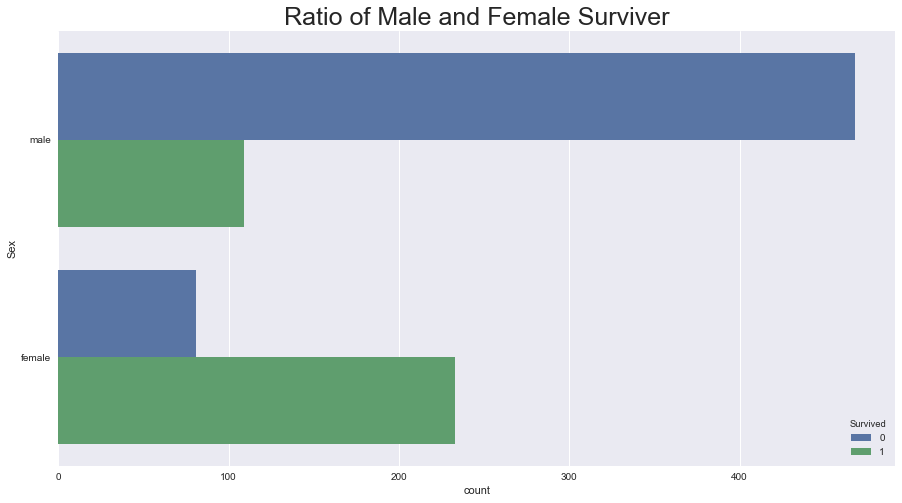

In [7]:
plt.subplots(figsize = (15,8))
sns.countplot(y = "Sex", hue="Survived", data = train_data)
plt.title("Ratio of Male and Female Surviver", fontsize = 25)

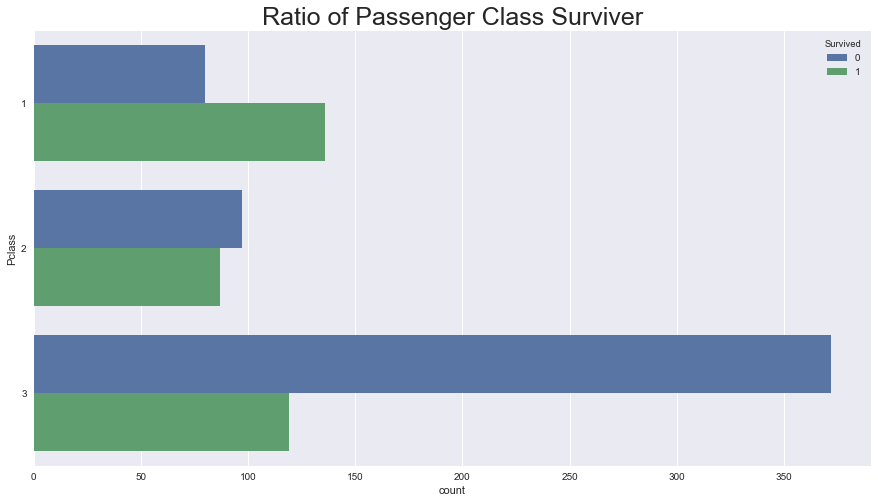

In [8]:
plt.subplots(figsize = (15,8))
sns.countplot(y = "Pclass", hue="Survived", data = train_data)
plt.title("Ratio of Passenger Class Surviver", fontsize = 25)

## Money buys life

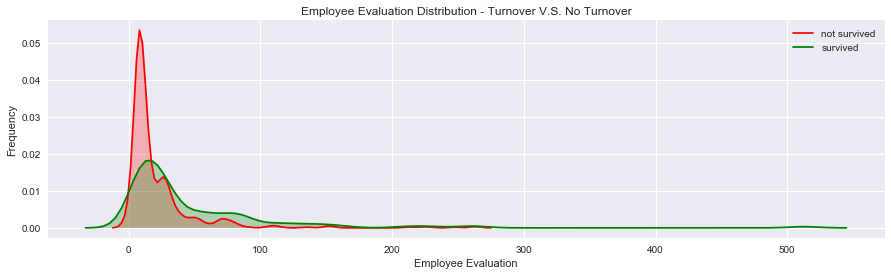

In [33]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 0),'Fare'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

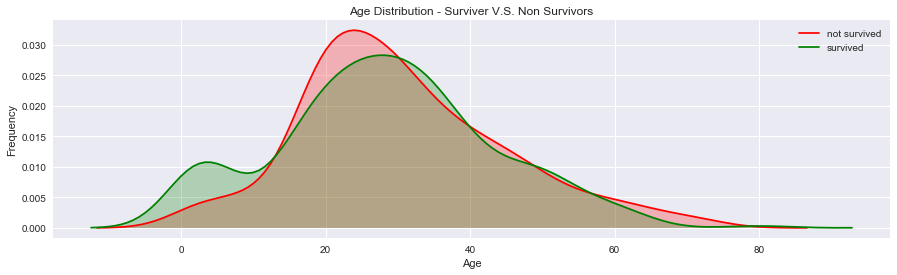

In [43]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 0),'Age'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(train_data.loc[(train_data['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('Age Distribution - Surviver V.S. Non Survivors')

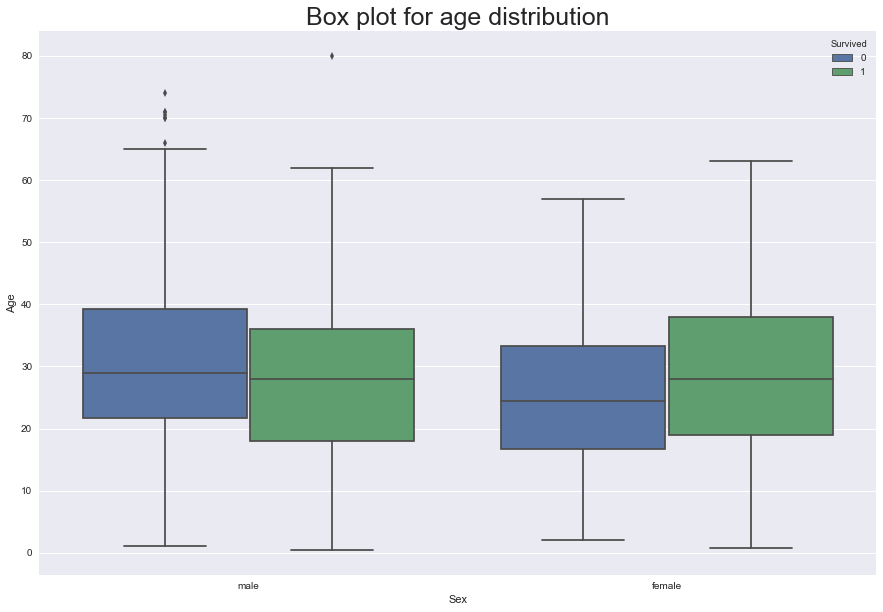

In [45]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=train_data).set_title("Box plot for age distribution", fontsize = 25)


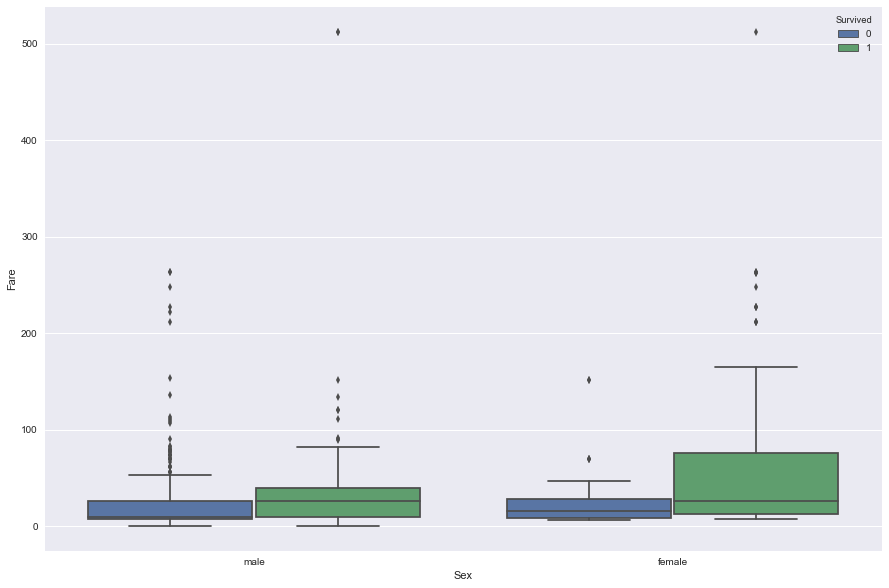

In [42]:
fig = plt.figure(figsize=(15,10),)
sns.boxplot(x="Sex", y="Fare", hue="Survived", data=train_data)

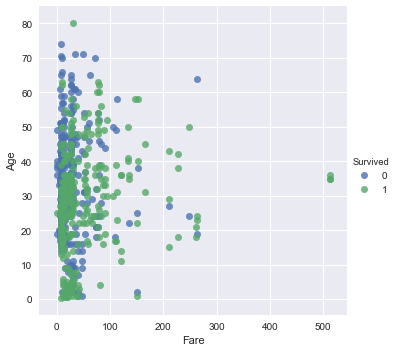

In [50]:
fig = plt.figure(figsize=(15,10))
sns.lmplot(x='Fare', y='Age', data=train_data,
           fit_reg=False, # No regression line
           hue='Survived')   # Color by evolution stage

In [39]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df1 = df1[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [33]:
df1 = pd.get_dummies(df1, drop_first=True)

In [36]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S


In [40]:
## Where did the two NaN value for Embarked go ???
df1.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
from sklearn.preprocessing import Imputer

In [43]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
corr = df.corr()**2

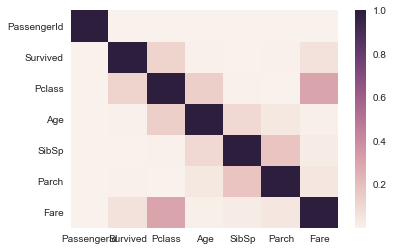

In [47]:
sns.heatmap(corr)

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,None,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,None,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,None,C


In [49]:
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,None,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,None,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,None,1,0,1


In [51]:
corr = df.corr()**2

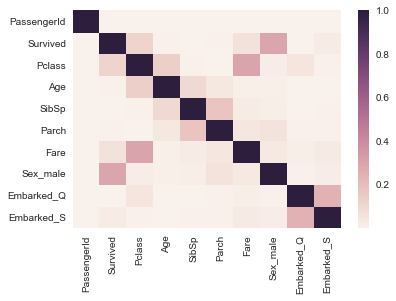

In [52]:
sns.heatmap(corr)

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [54]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute

In [55]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,None,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,None,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,None,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,None,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,None,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,None,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,None,0,0,0


In [57]:
df1 = pd.concat([df["Survived"],df["Pclass"],df.ix[:,"Age":"Parch"],df.ix[:,"Sex_male":],df["Fare"]], axis=1)

In [58]:
age_filled_data = KNN(k=10).complete(df1)

Imputing row 1/891 with 0 missing, elapsed time: 0.144
Imputing row 101/891 with 0 missing, elapsed time: 0.165
Imputing row 201/891 with 0 missing, elapsed time: 0.167
Imputing row 301/891 with 1 missing, elapsed time: 0.168
Imputing row 401/891 with 0 missing, elapsed time: 0.170
Imputing row 501/891 with 0 missing, elapsed time: 0.171
Imputing row 601/891 with 0 missing, elapsed time: 0.172
Imputing row 701/891 with 0 missing, elapsed time: 0.174
Imputing row 801/891 with 0 missing, elapsed time: 0.175


In [59]:
Data = pd.DataFrame(age_filled_data, columns = df1.columns)

In [60]:
Data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Fare
0,0.0,3.0,22.0,1.0,0.0,1.0,0.0,1.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,0.0,0.0,1.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,0.0,0.0,1.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,1.0,0.0,1.0,8.0500


In [61]:
X = Data.ix[:,"Pclass":]

In [62]:
y = Data["Survived"]

In [63]:
#age_filled_data_nor = NuclearNormMinimization().complete(df1)

In [64]:
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)

In [65]:
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

In [66]:
Data

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Fare
0,0.0,3.0,22.000000,1.0,0.0,1.0,0.0,1.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,0.0,0.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,0.0,0.0,1.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,0.0,0.0,1.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,1.0,0.0,1.0,8.0500
5,0.0,3.0,39.787921,0.0,0.0,1.0,1.0,0.0,8.4583
6,0.0,1.0,54.000000,0.0,0.0,1.0,0.0,1.0,51.8625
7,0.0,3.0,2.000000,3.0,1.0,1.0,0.0,1.0,21.0750
8,1.0,3.0,27.000000,0.0,2.0,0.0,0.0,1.0,11.1333
9,1.0,2.0,14.000000,1.0,0.0,0.0,0.0,0.0,30.0708


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .33)

In [69]:
X_train

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Fare
577,1.0,39.000000,1.0,0.0,0.0,0.0,1.0,55.9000
66,2.0,29.000000,0.0,0.0,0.0,0.0,1.0,10.5000
499,3.0,24.000000,0.0,0.0,1.0,0.0,1.0,7.7958
835,1.0,39.000000,1.0,1.0,0.0,0.0,0.0,83.1583
293,3.0,24.000000,0.0,0.0,0.0,0.0,1.0,8.8500
771,3.0,48.000000,0.0,0.0,1.0,0.0,1.0,7.8542
75,3.0,25.000000,0.0,0.0,1.0,0.0,1.0,7.6500
781,1.0,17.000000,1.0,0.0,0.0,0.0,1.0,57.0000
332,1.0,38.000000,0.0,1.0,1.0,0.0,1.0,153.4625
63,3.0,4.000000,3.0,2.0,1.0,0.0,1.0,27.9000


In [70]:
# Use Standard Scale
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train["Age"] = scaler.fit_transform(X_train["Age"])
X_train["Fare"] = scaler.fit_transform(X_train["Fare"])


/Users/masumrumi/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/masumrumi/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/masumrumi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [71]:
scaler = MinMaxScaler()
X_test["Age"] = scaler.fit_transform(X_test["Age"])
X_test["Fare"] = scaler.fit_transform(X_test["Fare"])

/Users/masumrumi/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/masumrumi/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/masumrumi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [72]:
X_train.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Fare
577,1.0,0.484795,1.0,0.0,0.0,0.0,1.0,0.109110
66,2.0,0.359135,0.0,0.0,0.0,0.0,1.0,0.020495
499,3.0,0.296306,0.0,0.0,1.0,0.0,1.0,0.015216
835,1.0,0.484795,1.0,1.0,0.0,0.0,0.0,0.162314
293,3.0,0.296306,0.0,0.0,0.0,0.0,1.0,0.017274


In [73]:
X_test.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Fare
509,3.0,0.317942,0.0,0.0,1.0,0.0,1.0,0.214813
572,1.0,0.444260,0.0,0.0,1.0,0.0,1.0,0.100333
481,2.0,0.442594,0.0,0.0,1.0,0.0,1.0,0.000000
343,2.0,0.305310,0.0,0.0,1.0,0.0,1.0,0.049430
184,3.0,0.040043,0.0,2.0,0.0,0.0,1.0,0.083745


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier

In [75]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape


(596, 8)
(596,)
(295, 8)
(295,)


# Logistic Regression

In [115]:
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve

In [92]:
ll = LogisticRegression(solver='liblinear')

In [93]:
ll.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
ll_Y_pred = ll.predict(X_test)

In [95]:
accuracy_score(y_test, ll_Y_pred)

0.7593220338983051

In [96]:
print classification_report(y_test, ll_Y_pred, labels=ll.classes_)

             precision    recall  f1-score   support

        0.0       0.80      0.85      0.82       192
        1.0       0.68      0.59      0.63       103

avg / total       0.75      0.76      0.76       295



### Grid Search on Logistic Regression

In [97]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

grid = {'penalty': penalties, 'C': C_vals, }
gs = GridSearchCV(ll, grid,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1)

In [98]:
gs.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.13, 0.2, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 4.0, 4.5, 5.0, 5.1, 5.5, 6.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=False)

In [99]:
print gs.best_params_
print gs.best_score_

{'penalty': 'l2', 'C': 0.5}
0.820469798658


In [100]:
gs.best_params_['penalty']

'l2'

In [101]:
ll = LogisticRegression(penalty=gs.best_params_['penalty'], C=gs.best_params_['C'])

In [102]:
ll.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
ll_Y_pred = ll.predict(X_test)

In [104]:
accuracy_score(y_test, ll_Y_pred)

0.7593220338983051

In [105]:
print classification_report(y_test, ll_Y_pred, labels=ll.classes_)

             precision    recall  f1-score   support

        0.0       0.79      0.85      0.82       192
        1.0       0.68      0.58      0.63       103

avg / total       0.75      0.76      0.75       295



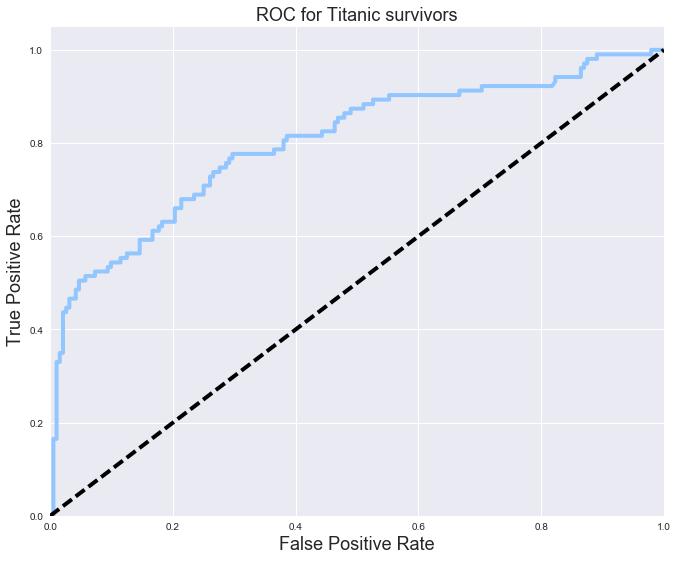

In [112]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-pastel')
y_score = ll.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

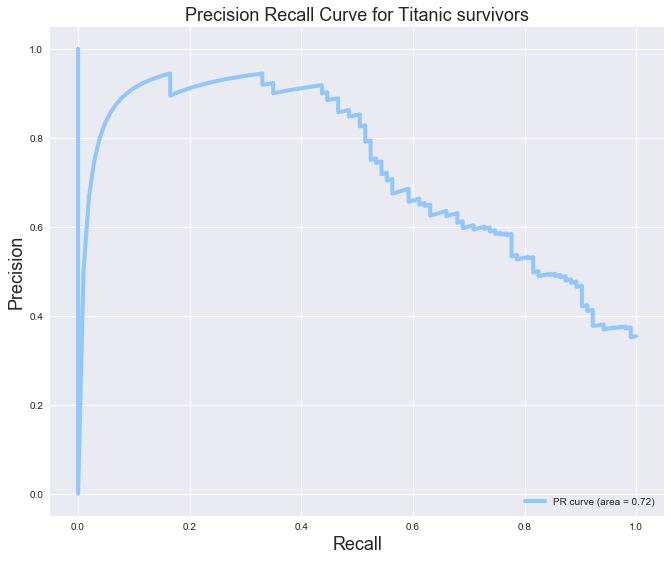

In [118]:
plt.style.use('seaborn-pastel')

y_score = ll.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## KNN classifier

In [120]:
from sklearn.model_selection import KNeighborsClassifier
knn = KNeighborsClassifier()
n_neighbors=range(1,10)
weights=['uniform','distance']
grid2 = {'n_neighbors':n_neighbors, 'weights':weights}
gs_knn = GridSearchCV(knn, grid2,verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
gs_knn.fit(X_train, y_train)

ImportError: cannot import name KNeighborsClassifier

In [ ]:
print gs_knn.best_params_
print gs_knn.best_score_

## DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
max_depth = range(1,10)
max_feature = range(1,10)
grid3 = {'max_depth':max_depth, 'max_features':max_feature}
gs_dtc = GridSearchCV(dtc, grid3, verbose=False, cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True))
gs_dtc.fit(X_train, y_train)

In [ ]:
print gs_dtc.best_score_
print gs_dtc.best_params_

## Bagging on Decision Tree

In [ ]:
bagging_dtc = BaggingClassifier(dtc)

In [ ]:
bag_dtc_cv = cross_val_score(bagging_dtc, X,y,cv = 5)

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
rf.fit(X, y)

In [ ]:
from sklearn.metrics import roc_curve,auc, precision_recall_curve

plt.style.use('seaborn-pastel')

y_score = ll.decision_function(X_test)

# For class 1, find the area under the curve
FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (survived)
plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.style.use('seaborn-pastel')

y_score = ll.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()